# BANK MARKETING: Customer Will Subscribe To Term Deposit or not.

## Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

#### Client data provided: age of the client, their job type, their marital status, etc. 

#### Information of the call: duration of the call, day and month of the call, etc.

### Dataset Attributes
Here is the description of all the variables:

•	Variable: Definition

•	ID: Unique client ID

•	age: Age of the client

•	job: Type of job

•	marital: Marital status of the client

•	education: Education level

•	default: Credit in default.

•	housing: Housing loan

•	loan: Personal loan

•	contact: Type of communication

•	month: Contact month

•	day_of_week: Day of week of contact

•	duration: Contact duration

•	campaign: number of contacts performed during this campaign to the client

•	pdays: number of days that passed by after the client was last contacted

•	previous: number of contacts performed before this campaign

•	poutcome: outcome of the previous marketing campaign


### Dataset Link-

#### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


•	https://github.com/FlipRoboTechnologies/ML-Datasets/tree/main/Bank%20Marketing

#### (i) Dataset to test the model:

•	https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv

#### (ii) Dataset to train the model:

•	https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv


### Objective: To predict if the client will subscribe to term deposit

In [72]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
os.chdir("F:\\FlipRobo\\Projects\\Bank Marketing\\")

In [74]:
# Reading the train dataset
df_train=pd.read_csv("termdeposit_train.csv")
df_train.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no
6,40444,56,retired,married,secondary,no,1044,no,no,telephone,3,jul,353,2,-1,0,unknown,yes
7,40194,50,technician,single,secondary,no,1811,no,no,cellular,8,jun,97,4,-1,0,unknown,no
8,29824,45,blue-collar,divorced,secondary,no,1951,yes,no,cellular,4,feb,692,1,-1,0,unknown,no
9,44676,35,admin.,married,secondary,no,1204,no,no,cellular,3,sep,789,2,-1,0,unknown,no


In [75]:
df_train.shape

(31647, 18)

In [76]:
# Reading the test dataset
df_test=pd.read_csv("termdeposit_test.csv")
df_test.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [77]:
df_test.shape

(13564, 17)

#### Observation: 

(i) Train data set: 31647 rows, 18 columns
    
(ii) Test data set: 13564 rows, 17 columns

In [78]:
df_train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

## Exploratory data analysis (EDA)

#### To perform EDA on both TRAIN nad TEST data sets. Lets the two datsets be concatenated row wise. As the TEST data set has no labels. Therefore to concatenate TRAIN and TEST datasets. Lets first drop the label ("subscribed") variable from the train dataset.

### Dropping the target variable from train dataset: 'subscribed'

In [79]:
df_train_without_label=df_train.drop(columns=["subscribed"],inplace=False)

In [80]:
df_train_without_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31647 non-null  int64 
 1   age        31647 non-null  int64 
 2   job        31647 non-null  object
 3   marital    31647 non-null  object
 4   education  31647 non-null  object
 5   default    31647 non-null  object
 6   balance    31647 non-null  int64 
 7   housing    31647 non-null  object
 8   loan       31647 non-null  object
 9   contact    31647 non-null  object
 10  day        31647 non-null  int64 
 11  month      31647 non-null  object
 12  duration   31647 non-null  int64 
 13  campaign   31647 non-null  int64 
 14  pdays      31647 non-null  int64 
 15  previous   31647 non-null  int64 
 16  poutcome   31647 non-null  object
dtypes: int64(8), object(9)
memory usage: 4.1+ MB


In [81]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


#### Observations:   
#### (i) Categorical variables:  
 job, marital, education, default, housing, loan, contact, month, outcome, and subscribed
 
#### (ii) Numerical variables: 
ID, age, balance, day, duration, campaign, pdays, and previous   

### Concatenating TRAIN and TEST datasets row wise

In [82]:
df=pd.concat([df_train_without_label,df_test],axis=0)
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [83]:
df.shape

(45211, 17)

#### Observations: Rows or samples = 45211 (31647 samples of train dataset + 13564 samples of test dataset) 

In [84]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

#### Observation: There are no missing values in train and test datasets.

In [85]:
df.nunique()

ID           45211
age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
dtype: int64

#### Observation: age, balance, day, duration, campaign, pdays, and previous can be treated as continuous numerical variables

In [86]:
df.drop_duplicates()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


### Dropping "ID" from both train and test data sets

#### As "ID" is not going to influence the prediction, so dropping this variable from both train and test datasets.

In [87]:
df1=df.drop("ID", axis=1)
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


#### Observation: No. of train and test columns reduced from 18 to 17 and 17 to 16 respectively after dropping the "ID" variable.

In [88]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [89]:
Categorical=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]

In [90]:
df1[["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome"]].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
dtype: int64

#### Observation: Among all these categorical variables, "education" is ordinal whereas all other variables can be considered as nominal.

### Categorical to numerical encoding: Ordinal Encoding - "education"

In [91]:
df1["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [92]:
df1['education']=df1['education'].map({'unknown':1,'primary':2,'secondary':3,'tertiary':4})


In [93]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,56,admin.,married,1,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown
1,31,unknown,married,3,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown
2,27,services,married,3,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown
3,57,management,divorced,4,no,3287,no,no,cellular,22,jun,867,1,84,3,success
4,31,technician,married,3,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown


In [94]:
df1["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

### Categorical to numerical encoding: One hot encoding - "job", "marital","default", "housing", "loan", "contact", "month", "poutcome"

In [95]:
df2=pd.get_dummies(df1)   
df2.head()

,age,education,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,56,1,1933,19,44,2,-1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,31,3,3,20,91,2,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,27,3,891,18,240,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,57,4,3287,22,867,1,84,3,0,0,...,1,0,0,0,0,0,0,0,1,0
4,31,3,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [96]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 0 to 13563
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   balance            45211 non-null  int64
 3   day                45211 non-null  int64
 4   duration           45211 non-null  int64
 5   campaign           45211 non-null  int64
 6   pdays              45211 non-null  int64
 7   previous           45211 non-null  int64
 8   job_admin.         45211 non-null  uint8
 9   job_blue-collar    45211 non-null  uint8
 10  job_entrepreneur   45211 non-null  uint8
 11  job_housemaid      45211 non-null  uint8
 12  job_management     45211 non-null  uint8
 13  job_retired        45211 non-null  uint8
 14  job_self-employed  45211 non-null  uint8
 15  job_services       45211 non-null  uint8
 16  job_student        45211 non-null  uint8
 17  job_technici

#### Observation: All the variables are now numerical.

In [97]:
df_train['subscribed']=df_train['subscribed'].map({"no":0,"yes":1})
df_train[['subscribed']].head()

,subscribed
0,0
1,0
2,0
3,1
4,0


## Data Visualization

### Check for multicollinearity

In [98]:
df2.corr().round(2)

,age,education,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
age,1.00,-0.17,0.10,-0.01,-0.00,0.00,-0.02,0.00,-0.06,-0.04,...,0.05,0.02,-0.13,0.03,0.06,0.03,-0.00,-0.02,0.04,-0.00
education,-0.17,1.00,0.05,0.02,0.00,0.00,0.01,0.03,-0.03,-0.35,...,-0.07,0.03,-0.08,0.06,0.01,0.01,0.02,0.01,0.04,-0.04
balance,0.10,0.05,1.00,0.00,0.02,-0.01,0.00,0.02,-0.03,-0.05,...,0.03,0.02,-0.07,0.12,0.04,0.02,0.01,0.01,0.04,-0.03
day,-0.01,0.02,0.00,1.00,-0.03,0.16,-0.09,-0.05,-0.01,-0.02,...,-0.19,-0.02,-0.03,0.10,0.03,-0.05,-0.07,-0.03,-0.03,0.09
duration,-0.00,0.00,0.02,-0.03,1.00,-0.08,-0.00,0.00,-0.02,0.01,...,-0.02,-0.01,0.01,-0.01,0.02,0.02,-0.02,-0.00,0.04,-0.00
campaign,0.00,0.00,-0.01,0.16,-0.08,1.00,-0.09,-0.03,-0.02,0.01,...,0.04,-0.02,-0.07,-0.08,-0.05,-0.04,-0.09,-0.02,-0.06,0.11
pdays,-0.02,0.01,0.00,-0.09,-0.00,-0.09,1.00,0.45,0.03,0.02,...,-0.11,0.03,0.08,0.01,0.06,0.08,0.70,0.39,0.23,-0.87
previous,0.00,0.03,0.02,-0.05,0.00,-0.03,0.45,1.00,0.01,-0.02,...,-0.06,0.03,0.00,0.04,0.05,0.06,0.35,0.31,0.20,-0.53
job_admin.,-0.06,-0.03,-0.03,-0.01,-0.02,-0.02,0.03,0.01,1.00,-0.19,...,-0.00,0.01,0.03,-0.01,0.01,0.01,0.02,0.01,0.01,-0.03
job_blue-collar,-0.04,-0.35,-0.05,-0.02,0.01,0.01,0.02,-0.02,-0.19,1.00,...,0.02,-0.04,0.17,-0.05,-0.04,-0.04,0.00,0.00,-0.05,0.02


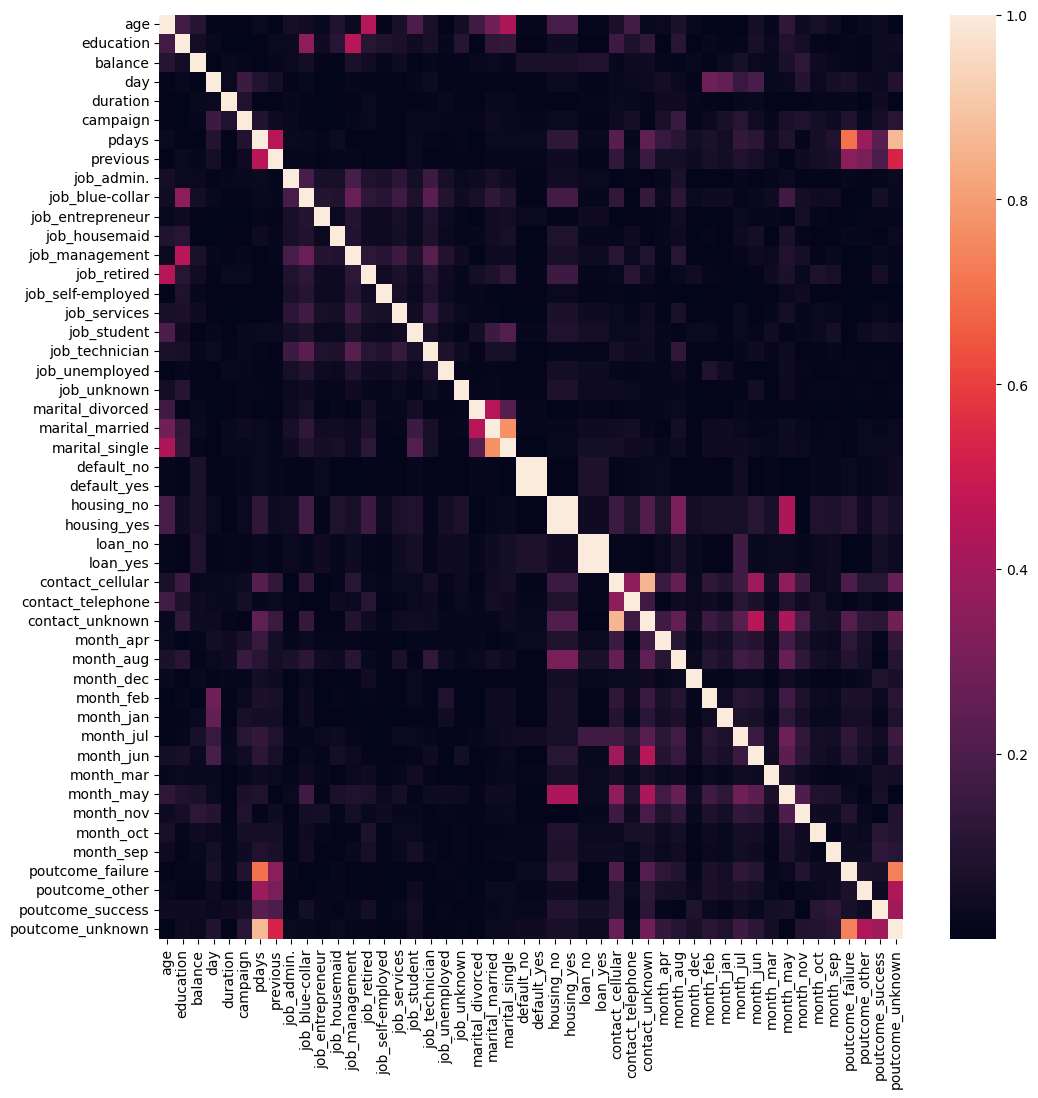

In [99]:
plt.figure(figsize=(12,12))
sns.heatmap(abs(df2.corr()), annot=False)
plt.show()

#### Observation: "pdays" and "poutcome_unknown" are highly correlated (=- 0.87)

In [100]:
df2.nunique()

age                    77
education               4
balance              7168
day                    31
duration             1573
campaign               48
pdays                 559
previous               41
job_admin.              2
job_blue-collar         2
job_entrepreneur        2
job_housemaid           2
job_management          2
job_retired             2
job_self-employed       2
job_services            2
job_student             2
job_technician          2
job_unemployed          2
job_unknown             2
marital_divorced        2
marital_married         2
marital_single          2
default_no              2
default_yes             2
housing_no              2
housing_yes             2
loan_no                 2
loan_yes                2
contact_cellular        2
contact_telephone       2
contact_unknown         2
month_apr               2
month_aug               2
month_dec               2
month_feb               2
month_jan               2
month_jul               2
month_jun   

### Check for skewness: Plotting the histogram of continuous variables and the ordinal categorical variable "education"

In [101]:
df2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','education']].describe()

,age,balance,day,duration,campaign,pdays,previous,education
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,3.060516
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.778704
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,3.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,3.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,4.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,4.000000


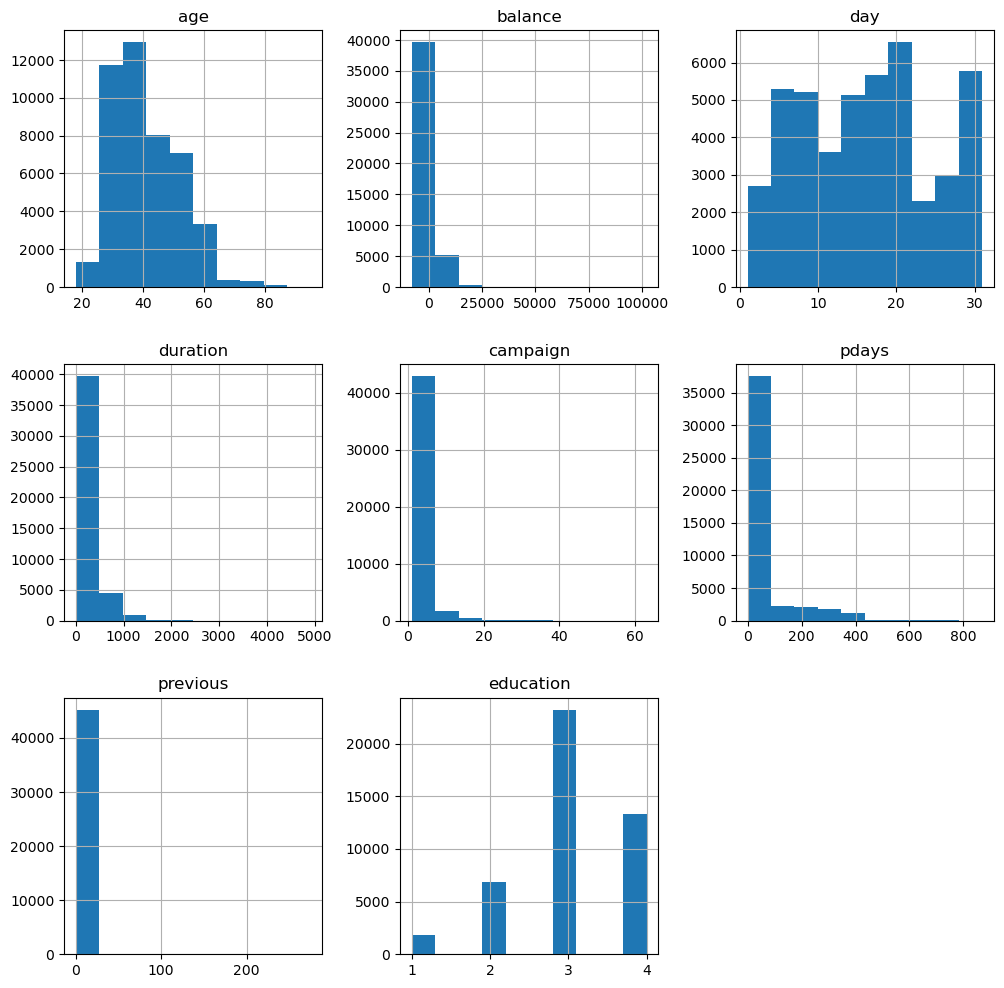

In [102]:
df2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','education']].hist(figsize=(12,12))
plt.show()

In [103]:
df2[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','education']].skew()


age           0.684818
balance       8.360308
day           0.093079
duration      3.144318
campaign      4.898650
pdays         2.615715
previous     41.846454
education    -0.627405
dtype: float64

#### Observation: Except "day", all the variables are highly skewed.

### Box-cox transformation: Reducing skewness of highly skewed variables

Skewness of age: -0.004251783129110785


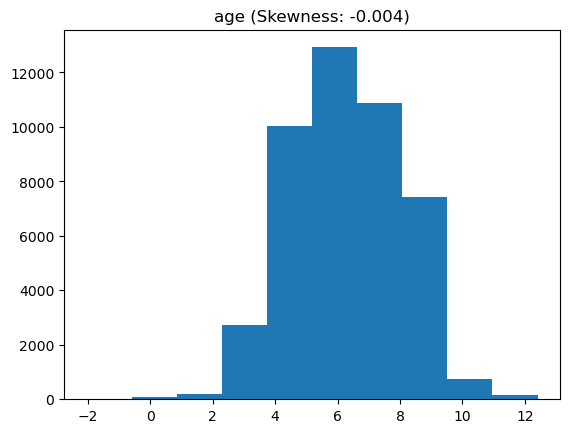

Skewness of balance: 0.511566547653541


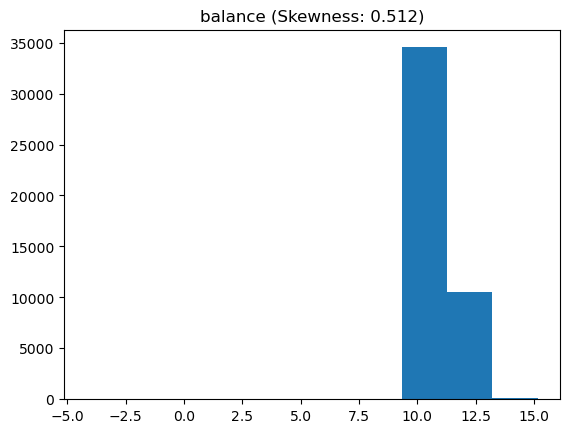

Skewness of day: -0.24910375257252892


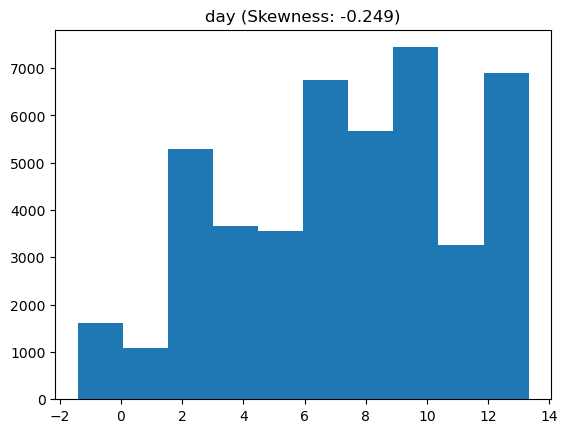

Skewness of duration: 0.02531334867994862


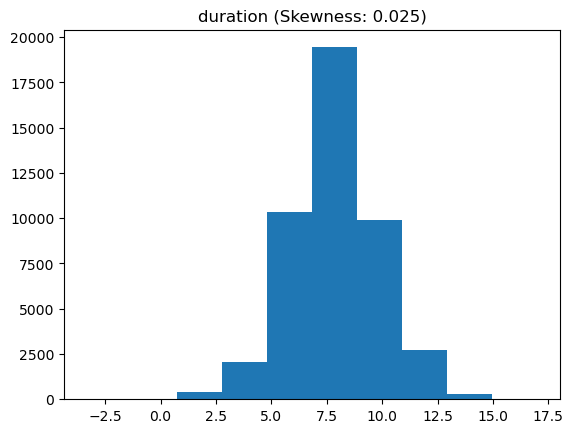

Skewness of campaign: -0.15245057600229883


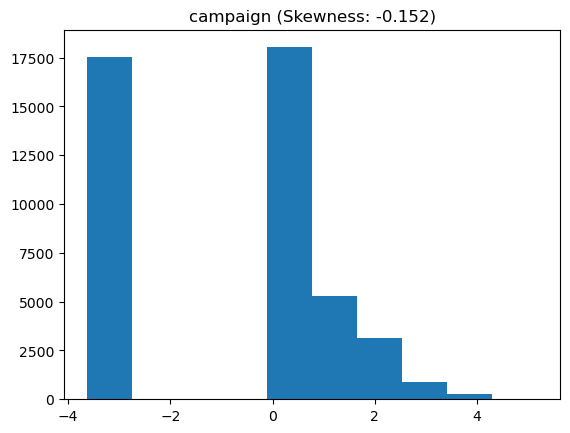

Skewness of pdays: 1.6429847273185916


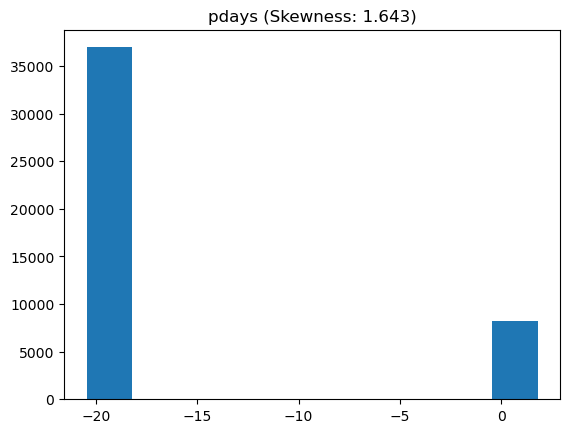

Skewness of previous: 1.6429563854749725


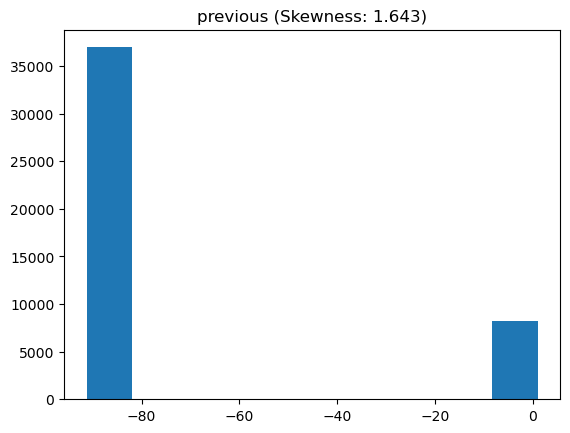

In [104]:
from scipy.stats import boxcox

# DataFrame to store transformed features
df3_skewed = pd.DataFrame()

# Loop over each numerical feature
for i in ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']:
    # Add a small constant to ensure positivity
    df2_train_pos = df2[i] - df2[i].min() + 0.01
    
    # Apply Box-Cox transformation
    transformed_feature, lambda_value = boxcox(df2_train_pos)
    
    # Add transformed feature to the DataFrame
    df3_skewed[i] = transformed_feature
    
    # Compute skewness of the transformed feature
    skewness = pd.Series(transformed_feature).skew()
    print(f"Skewness of {i}:", skewness)
    
    # Plot histogram of the transformed feature
    plt.hist(transformed_feature)
    plt.title(f"{i} (Skewness: {skewness:.3f})")
    plt.show()


In [105]:
df3_skewed.skew()

age        -0.004252
balance     0.511567
day        -0.249104
duration    0.025313
campaign   -0.152451
pdays       1.642985
previous    1.642956
dtype: float64

In [106]:
# Dropping the untransformed ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] columns from the df2 dataset

df2.drop(columns=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],inplace=True)
df2.head()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [107]:
df2.columns

Index(['education', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'default_no', 'default_yes', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [108]:
df3_skewed.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [109]:
# Reset index of df2 and df3_skewed
df2.reset_index(drop=True, inplace=True)
df3_skewed.reset_index(drop=True, inplace=True)

# Concatenate the transformed features to df2
df3 = pd.concat([df2,
                df3_skewed], axis=1)


In [110]:
df3.head()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,8.606021,11.351837,8.994383,5.072685,0.009956,-20.468446,-91.247053
1,3,0,0,0,0,0,0,0,0,0,...,0,0,1,4.618550,11.029988,9.385003,6.415387,0.009956,-20.468446,-91.247053
2,3,0,0,0,0,0,0,0,1,0,...,0,0,1,3.616689,11.186342,8.596709,8.447808,-3.637685,-20.468446,-91.247053
3,4,0,0,0,0,1,0,0,0,0,...,0,1,0,8.726678,11.543717,10.146974,11.630235,-3.637685,1.681652,0.674578
4,3,0,0,0,0,0,0,0,0,0,...,0,0,1,4.618550,11.051327,1.638368,9.517602,-3.637685,-20.468446,-91.247053


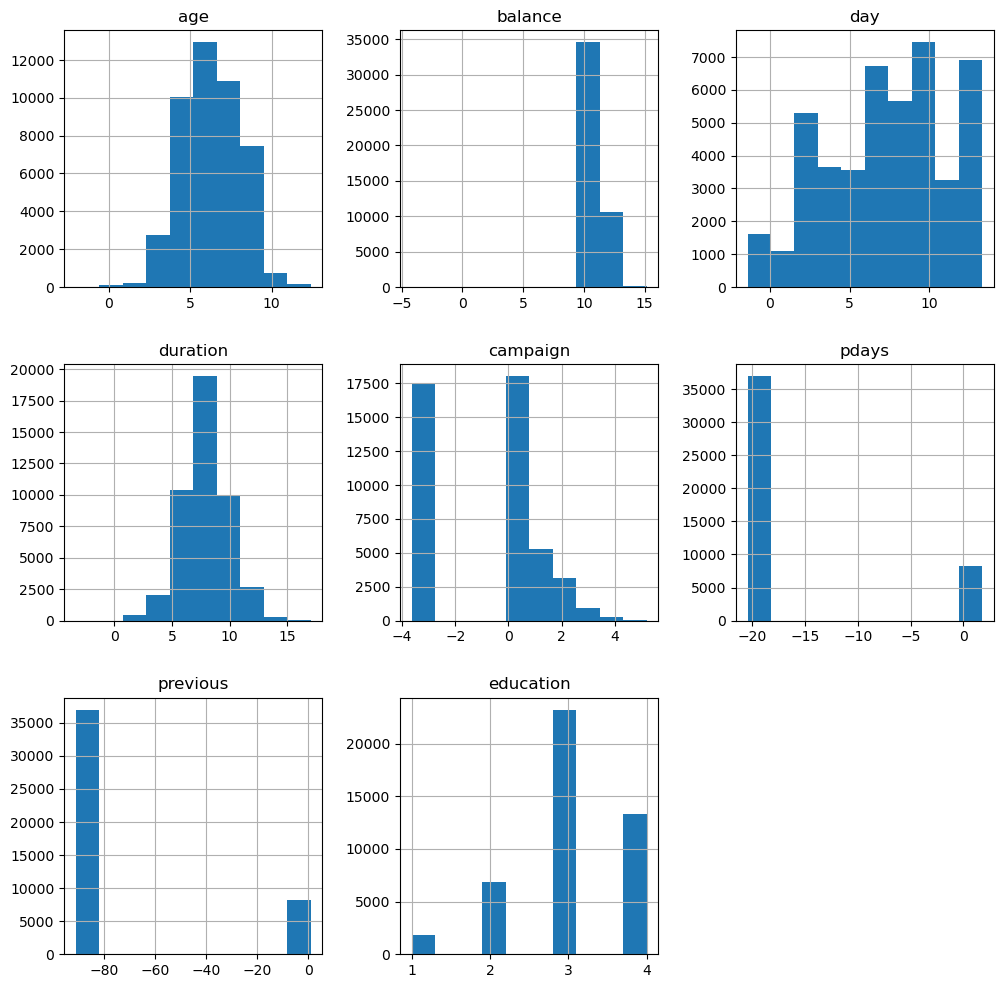

In [111]:
# Plotting the histogram of the transformed columns to check the skewness
df3[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','education']].hist(figsize=(12,12))
plt.show()

In [112]:
df3[['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous','education']].skew()

age         -0.004252
balance      0.511567
day         -0.249104
duration     0.025313
campaign    -0.152451
pdays        1.642985
previous     1.642956
education   -0.627405
dtype: float64

#### Observation: Clearly skewness of the variables have considerable reduced

### To check for scale of the variables

In [113]:
df3.describe()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.00000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,3.060516,0.114375,0.215257,0.032890,0.027427,0.209197,0.050076,0.034925,0.09188,0.020747,...,0.040698,0.033421,0.817478,6.266082,11.223012,7.309076,7.883946,-0.948369,-16.414770,-74.499893
std,0.778704,0.318269,0.411005,0.178351,0.163326,0.406740,0.218105,0.183592,0.28886,0.142538,...,0.197592,0.179735,0.386278,1.750040,0.324332,3.706326,1.971647,2.245476,8.575882,35.429836
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,-2.034386,-4.168154,-1.410176,-3.339371,-3.637685,-20.468446,-91.247053
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,5.052343,11.042716,4.047359,6.659027,-3.637685,-20.468446,-91.247053
50%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,6.181462,11.110302,7.777902,7.814178,0.009956,-20.468446,-91.247053
75%,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,7.566549,11.273812,9.769057,9.101649,0.724818,-20.468446,-91.247053
max,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,12.405199,15.155741,13.324368,17.013942,5.186590,1.801410,1.018681


#### Observation: Variables 'age','balance','day' and 'duration' are in tens whereas rest are in ones. Therefore it is important to scale the variables.

### Standard Scaler: Scaling the variables            

In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df4=scaler.fit_transform(df3)
df5=pd.DataFrame(df4, columns=df3.columns)


In [115]:
df5.describe()

,education,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous
count,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,...,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04,4.521100e+04
mean,-1.260067e-16,1.192030e-15,-1.707368e-15,-6.267422e-15,-1.629680e-15,2.934008e-16,1.961117e-15,-3.703354e-15,-1.134686e-15,-3.352839e-15,...,-2.087878e-16,6.244590e-16,1.491737e-15,6.499806e-16,-2.026190e-15,1.138050e-15,1.510715e-16,-2.148594e-16,8.240369e-16,6.400401e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,...,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-2.646114e+00,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,...,-2.059725e-01,-1.859480e-01,-2.116316e+00,-4.743068e+00,-4.745549e+01,-2.352559e+00,-5.692420e+00,-1.197673e+00,-4.726886e-01,-4.726904e-01
25%,-7.771493e-02,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,...,-2.059725e-01,-1.859480e-01,4.725192e-01,-6.935569e-01,-5.559044e-01,-8.800506e-01,-6.212737e-01,-1.197673e+00,-4.726886e-01,-4.726904e-01
50%,-7.771493e-02,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,...,-2.059725e-01,-1.859480e-01,4.725192e-01,-4.835363e-02,-3.475195e-01,1.264947e-01,-3.538594e-02,4.267851e-01,-4.726886e-01,-4.726904e-01
75%,1.206484e+00,-3.593687e-01,-5.237395e-01,-1.844147e-01,-1.679298e-01,-5.143318e-01,-2.296000e-01,-1.902342e-01,-3.180824e-01,-1.455566e-01,...,-2.059725e-01,-1.859480e-01,4.725192e-01,7.431155e-01,1.566324e-01,6.637322e-01,6.176137e-01,7.451451e-01,-4.726886e-01,-4.726904e-01
max,1.206484e+00,2.782658e+00,1.909346e+00,5.422561e+00,5.954871e+00,1.944270e+00,4.355402e+00,5.256679e+00,3.143839e+00,6.870179e+00,...,4.855018e+00,5.377848e+00,4.725192e-01,3.508025e+00,1.212576e+01,1.622998e+00,4.630696e+00,2.732172e+00,2.124141e+00,2.131520e+00


#### Observation: After scaling, it is clear that all the variables are within similar range.

Next: To build the model

### To check if the classes are balanced or not

In [116]:
df_train['subscribed'].value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

#### Observation: Classes are unbalanced. Here class 0 which corresponds to "no" is a dominating class.

In [117]:
df5.shape

(45211, 48)

### Separating the concatenated test data from combined dataset

In [118]:
test_size=13564
df5_test=df5.tail(test_size)    # Segregating last 13564 rows as test data

df5_train = df5.iloc[:-test_size]   # Segregating last 31647 rows as train data

In [119]:
df5_train.shape

(31647, 48)

### SMOTE: To create additional minoroty class to remove unbalance 

In [120]:
X=df5_train
y=df_train['subscribed']
from imblearn.over_sampling import SMOTE
SM=SMOTE()
X,y=SM.fit_resample(X,y)

In [121]:
y.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

#### Observation: Clearly both the classes are now balanced.

### Model building

In [122]:
df5_test.shape

(13564, 48)

In [123]:
df5_train.shape

(31647, 48)

In [124]:
# Import Classification libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score,GridSearchCV


In [134]:
from sklearn.model_selection import train_test_split
maxAcc=0
for i in range(1000):
    X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=i)
    LR=LogisticRegression()
    model=LR.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Acc=accuracy_score(y_pred,y_test)
    if Acc>maxAcc:
        maxAcc=Acc
        random_state=i
print(f'Max accuracy: {maxAcc}')
print(f'Best_random_state: {random_state}')

Max accuracy: 0.8531026252983294
Best_random_state: 263


### Decision Tree Classifier

In [135]:
i=random_state  # for best accuracy
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=i)
DT=DecisionTreeClassifier()
model_DT=DT.fit(X_train,y_train)
y_pred_DT=model_DT.predict(X_test)
Acc=accuracy_score(y_pred_DT,y_test)
report=classification_report(y_pred_DT,y_test)
conf_matrix=confusion_matrix(y_pred_DT,y_test)
cv_score=cross_val_score(DT,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.9013723150357995
Cross validation score: 0.8970440707271313
Classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      8193
           1       0.91      0.90      0.90      8567

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760

Confusion matrix:
 [[7439  754]
 [ 899 7668]]


### Random Forest Classifier

In [136]:
RF=RandomForestClassifier()
model_RF=RF.fit(X_train,y_train)
y_pred_RF=model_RF.predict(X_test)
Acc=accuracy_score(y_pred_RF,y_test)
report=classification_report(y_pred_RF,y_test)
conf_matrix=confusion_matrix(y_pred_RF,y_test)
cv_score=cross_val_score(RF,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.9495823389021479
Cross validation score: 0.9465529122724874
Classification report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      8069
           1       0.97      0.94      0.95      8691

    accuracy                           0.95     16760
   macro avg       0.95      0.95      0.95     16760
weighted avg       0.95      0.95      0.95     16760

Confusion matrix:
 [[7781  288]
 [ 557 8134]]


### AdaBoost Classifier

In [137]:
AB=AdaBoostClassifier()
model_AB=AB.fit(X_train,y_train)
y_pred_AB=model_AB.predict(X_test)
Acc=accuracy_score(y_pred_AB,y_test)
report=classification_report(y_pred_AB,y_test)
conf_matrix=confusion_matrix(y_pred_AB,y_test)
cv_score=cross_val_score(AB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.898090692124105
Cross validation score: 0.8914179954106753
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90      8480
           1       0.89      0.91      0.90      8280

    accuracy                           0.90     16760
   macro avg       0.90      0.90      0.90     16760
weighted avg       0.90      0.90      0.90     16760

Confusion matrix:
 [[7555  925]
 [ 783 7497]]


### Gradient Boosting Classifier

In [138]:
GB=GradientBoostingClassifier()
model_GB=GB.fit(X_train,y_train)
y_pred_GB=model_GB.predict(X_test)
Acc=accuracy_score(y_pred_GB,y_test)
report=classification_report(y_pred_GB,y_test)
conf_matrix=confusion_matrix(y_pred_GB,y_test)
cv_score=cross_val_score(GB,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.9140811455847255
Cross validation score: 0.9131802686500989
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91      8058
           1       0.93      0.90      0.92      8702

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760

Confusion matrix:
 [[7478  580]
 [ 860 7842]]


### Support Vector Classifier

In [139]:
SV=SVC()
model_SV=SV.fit(X_train,y_train)
y_pred_SV=model_SV.predict(X_test)
Acc=accuracy_score(y_pred_SV,y_test)
report=classification_report(y_pred_SV,y_test)
conf_matrix=confusion_matrix(y_pred_SV,y_test)
cv_score=cross_val_score(SV,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

Accuracy score : 0.9078162291169452
Cross validation score: 0.9022608146345705
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      7651
           1       0.95      0.88      0.91      9109

    accuracy                           0.91     16760
   macro avg       0.91      0.91      0.91     16760
weighted avg       0.91      0.91      0.91     16760

Confusion matrix:
 [[7222  429]
 [1116 7993]]


### K Neighbors Classifier

In [140]:
KN=KNeighborsClassifier()
model_KN=KN.fit(X_train,y_train)
y_pred_KN=model_KN.predict(X_test)
Acc=accuracy_score(y_pred_KN,y_test)
report=classification_report(y_pred_KN,y_test)
conf_matrix=confusion_matrix(y_pred_KN,y_test)
cv_score=cross_val_score(KN,X_train,y_train,cv=10).mean()  # performing 10 folds cross validation
print(f'Accuracy score : {Acc}')
print(f'Cross validation score: {cv_score}')
print(f'Classification report:\n {report}')
print(f'Confusion matrix:\n {conf_matrix}')

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy score : 0.9023866348448687
Cross validation score: 0.8945119183155125
Classification report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      6992
           1       0.98      0.85      0.91      9768

    accuracy                           0.90     16760
   macro avg       0.90      0.91      0.90     16760
weighted avg       0.92      0.90      0.90     16760

Confusion matrix:
 [[6847  145]
 [1491 8277]]


C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


##### Observations: Among all the classification models "Random Forest Classifier" has the best accuracy (= 0.95). Here, accuracy may be considered an appropriate metric to decide the performance of a classification model. This is because all the classes were balanced using SMOTE before training the model.

### Hyperparameter tuning of Random Forest Classifier using GridSearchCV

In [146]:
 from pprint import pprint
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [149]:
from sklearn.model_selection import GridSearchCV
hyp={'criterion': ['gini','entropy'],
    'max_depth':[2,6,10,14,18,20,22,24],  
    'max_features': ['auto'],
    'n_jobs': [-1],  # Utilize all available cores
    'min_samples_split':[2,3,5,10],
     'random_state': [random_state],
    'verbose': [0]}
grid_search=GridSearchCV(RF,param_grid=hyp)
grid_search.fit(X_train,y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimators:", grid_search.best_estimator_)
print("Best score:", grid_search.best_score_)

Best parameters: {'criterion': 'gini', 'max_depth': 24, 'max_features': 'auto', 'min_samples_split': 2, 'n_jobs': -1, 'random_state': 263, 'verbose': 0}
Best estimators: RandomForestClassifier(max_depth=24, n_jobs=-1, random_state=263)
Best score: 0.9417450885559273


#### Observation: The "Hypertuned Random Forest Classifier" (accuracy = 0.94) did not perform well compared to the default "Ranodom Forset Classifier"(accuracy = 0.95). Therefore, the default random forest classifier will be saved as the final model

### Saving the final model: Random Forest Classifier

In [150]:
import pickle
file_name='bank marketing.pkl'
pickle.dump(RF,open(file_name,'wb'))

### Loading the saved model

In [151]:
loaded_model=pickle.load(open('bank marketing.pkl','rb'))
result=loaded_model.score(X_test,y_test)
print(result)

0.9495823389021479


### Prediction on TEST data file

In [173]:
y_predicted=loaded_model.predict(df5_test)

for i in range(len(y_predicted)):
    if y_predicted[i]==0: 
        print('No')
    else:
        print('Yes')

No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
No
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
Yes
No
Yes
No
No
No
Yes
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
Yes
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
Yes
No
No
No
No
No
No
Yes
Yes
Yes
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
No
Yes
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
Yes
No
No
Yes
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
No
No
Yes
No
No
No
No
